In [341]:
%matplotlib inline
# please make sure the following dependencies are already installed on your local machine
import pandas as pd         
import matplotlib.pyplot as plt
import numpy as np

# please decompress the zip files in the citibike folder before running the code
citibike2022 = pd.read_csv('../data/citibike/CitiBikeJanToDec2022.csv')
citibike2019 = pd.read_csv('../data/citibike/CitiBikeJanToDec2019.csv')
citibike2020 = pd.read_csv('../data/citibike/CitiBikeJanToDec2020.csv')

In [342]:
# number of rows and cols in the citibike2022 DataFrame
print(citibike2022.shape)

# number of rows and cols in the citibike2019 DataFrame
print(citibike2019.shape)

# number of rows and cols in the citibike2020 DataFrame
print(citibike2020.shape)

(895485, 13)
(404947, 15)
(336802, 15)


In [343]:
# create a new column 'startdate' by extracting only the date information from the 'started_at' of each entry
citibike2022['startdate'] = citibike2022['started_at'].str[:10]

# examine the first 5 entries of the updated citibike2022 DataFrame, we can see that the new column
# 'startdate' has already been created
citibike2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13


In [344]:
# create a new column 'startdate' by extracting only the date information from the 'starttime' of each entry
citibike2019['startdate'] = citibike2019['starttime'].str[:10]

# examine the first 5 entries of the updated citibike2019 DataFrame, we can see that the new column
# 'startdate' has already been created
citibike2019.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019-01-01
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019-01-01
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019-01-01
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019-01-01
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019-01-01


In [345]:
# create a new column 'startdate' by extracting only the date information from the 'starttime' of each entry
citibike2020['startdate'] = citibike2020['starttime'].str[:10]

# examine the first 5 entries of the updated citibike2020 DataFrame, we can see that the new column
# 'startdate' has already been created
citibike2020.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,2020-01-01
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,2020-01-01
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,2020-01-01
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,2020-01-01
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,2020-01-01


In [346]:
# find the daily trips count of each date from the citibike2022 DataFrame
# resulting dateTripsPair2022: {'2022-01-26': 1149, '2022-01-28': 894, '2022-01-10': 859...}
dateTripsPair2022 = {}
for date in citibike2022['startdate']:
    dateTripsPair2022[date] = dateTripsPair2022.get(date, 0) + 1

# since the line graph we are going to plot requires us to have dates being in ascending sorted
# order, we need to sort the dateTripsPair2022 hashmap based on the date key
# resulting sortedDateTripsPairList: [('2022-01-01', 592), ('2022-01-02', 1248), ('2022-01-03', 832)...]
sortedDateTripsPairList2022 = sorted(dateTripsPair2022.items(), key=lambda x:x[0])

dateList2022 = []
dailyTripsCountList2022 = []

for eachPair in sortedDateTripsPairList2022:
    # date of this pair
    dateList2022.append(eachPair[0])
    
    # total trips count on this date
    dailyTripsCountList2022.append(eachPair[1])

In [347]:
# find the 7-day moving average of 2022, using numpy's rolling function
movingAvg2022 = pd.Series(dailyTripsCountList2022).rolling(window=7).mean()

# convert movingAvg2022 pandas series into list for future plotting purpose
movingAvg2022 = movingAvg2022.tolist()

In [348]:
# carry out the same operations to find the daily trips count of each date in 2019
dateTripsPair2019 = {}
for date in citibike2019['startdate']:
    dateTripsPair2019[date] = dateTripsPair2019.get(date, 0) + 1

sortedDateTripsPairList2019 = sorted(dateTripsPair2019.items(), key=lambda x:x[0])

dateList2019 = []
dailyTripsCountList2019 = []

for eachPair in sortedDateTripsPairList2019:
    dateList2019.append(eachPair[0])
    dailyTripsCountList2019.append(eachPair[1])

In [349]:
# find the 7-day moving average of 2019, using numpy's rolling function
movingAvg2019 = pd.Series(dailyTripsCountList2019).rolling(window=7).mean()

# convert movingAvg2022 pandas series into list for future plotting purpose
movingAvg2019 = movingAvg2019.tolist()

In [350]:
# carry out the same operations to find the daily trips count of each date in 2020
dateTripsPair2020 = {}
for date in citibike2020['startdate']:
    dateTripsPair2020[date] = dateTripsPair2020.get(date, 0) + 1

sortedDateTripsPairList2020 = sorted(dateTripsPair2020.items(), key=lambda x:x[0])

dateList2020 = []
dailyTripsCountList2020 = []

for eachPair in sortedDateTripsPairList2020:
    dateList2020.append(eachPair[0])
    dailyTripsCountList2020.append(eachPair[1])

In [351]:
# find the 7-day moving average of 2020, using numpy's rolling function
movingAvg2020 = pd.Series(dailyTripsCountList2020).rolling(window=7).mean()

# convert movingAvg2022 pandas series into list for future plotting purpose
movingAvg2020 = movingAvg2020.tolist()

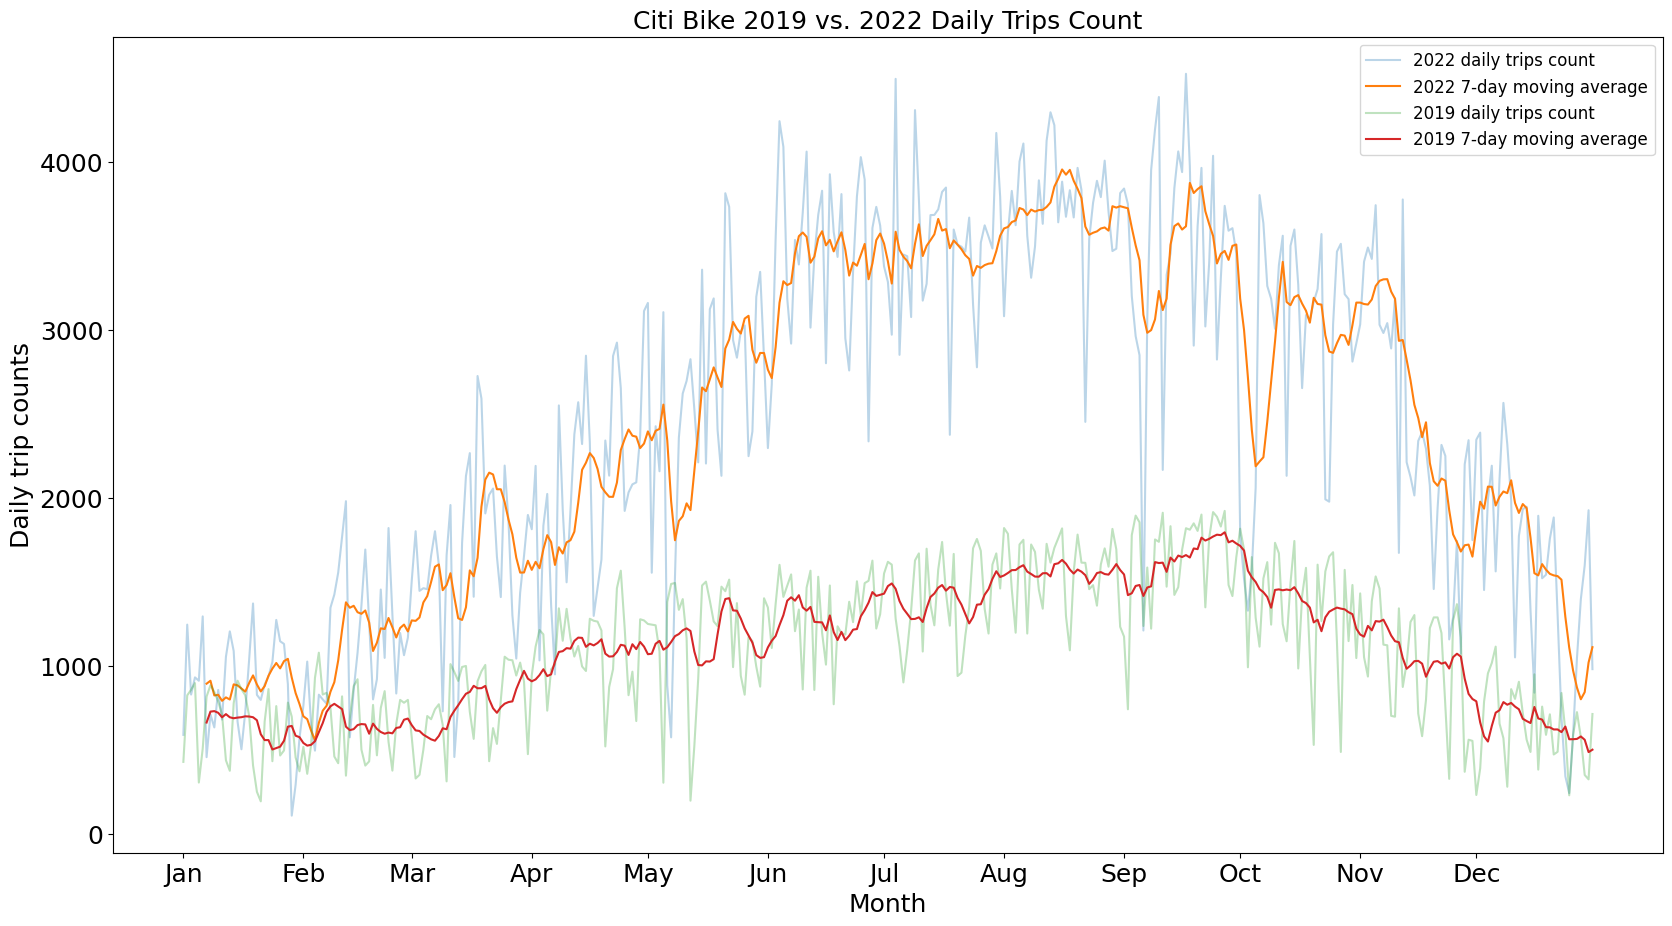

In [352]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2022, dailyTripsCountList2022, label='2022 daily trips count', alpha=0.3)
plt.plot(dateList2022, movingAvg2022, label='2022 7-day moving average')
plt.plot(dateList2022, dailyTripsCountList2019, label='2019 daily trips count', alpha=0.3)
plt.plot(dateList2022, movingAvg2019, label='2019 7-day moving average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily trip counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2022[0], end=dateList2022[len(dateList2022) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

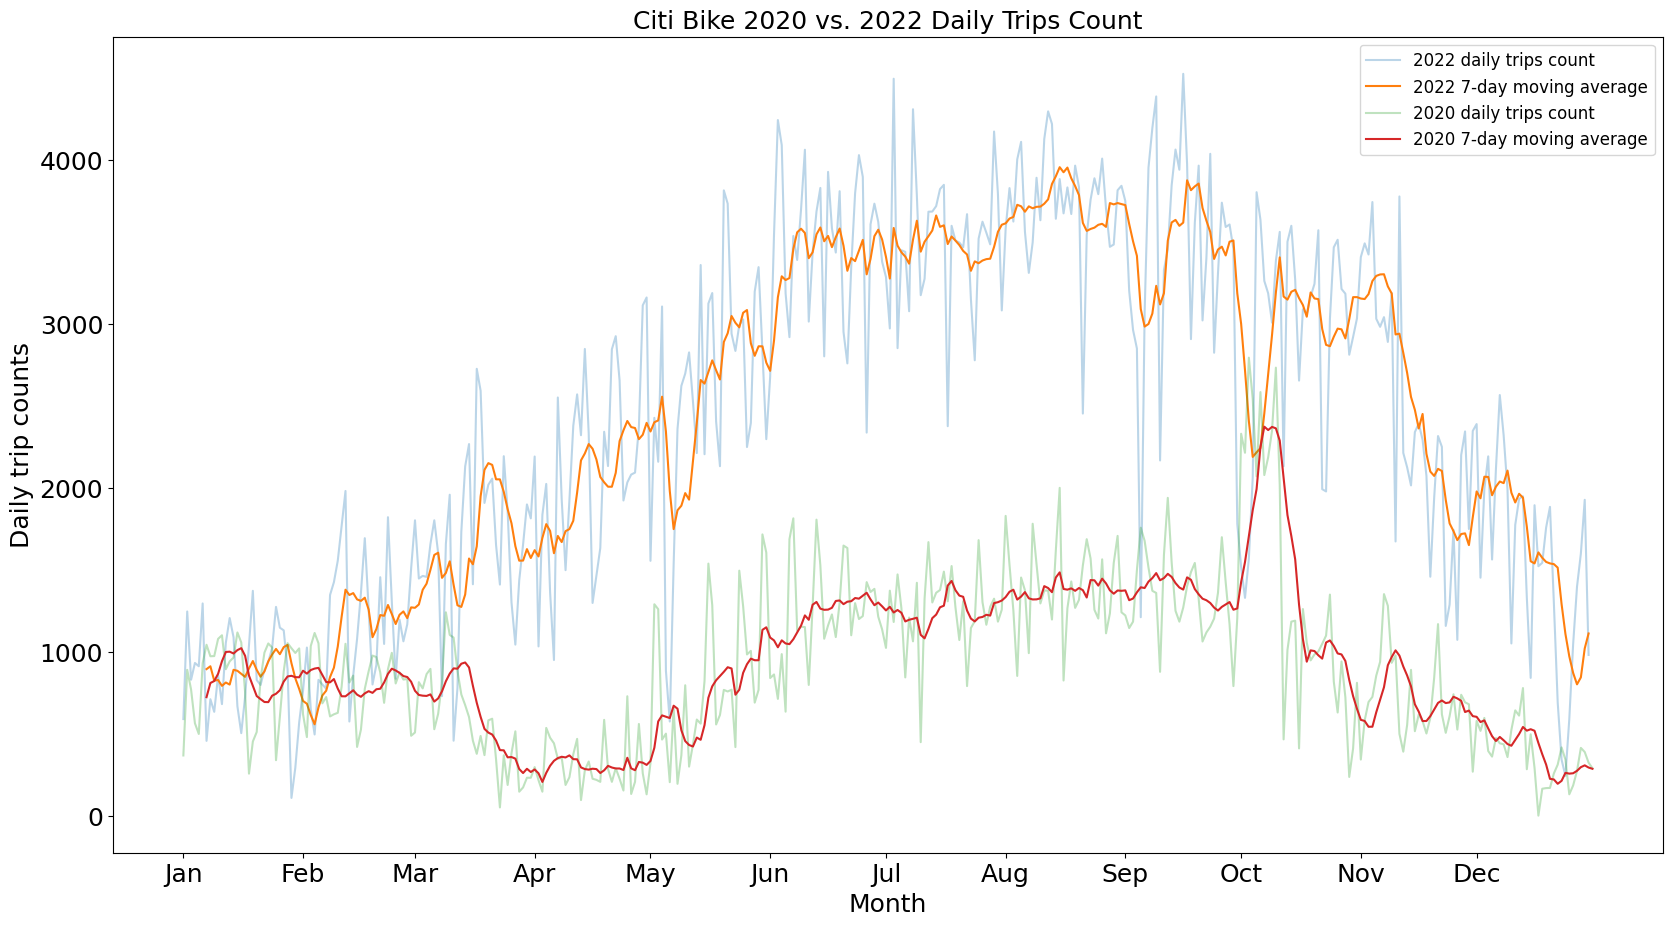

In [353]:
# since 2020 has 366 days and 2022 has 365 days, we need to pad the 
# 2022 data with a 'NaN' in order for plotting to work
dailyTripsCountList2022.append(np.nan)
movingAvg2022.append(np.nan)

# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2020, dailyTripsCountList2022, label='2022 daily trips count', alpha=0.3)
plt.plot(dateList2020, movingAvg2022, label='2022 7-day moving average')
plt.plot(dateList2020, dailyTripsCountList2020, label='2020 daily trips count', alpha=0.3)
plt.plot(dateList2020, movingAvg2020, label='2020 7-day moving average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily trip counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

In [354]:
# popped the NaN that we've added to the 2022 data once finished plotting
dailyTripsCountList2022.pop()
movingAvg2022.pop()

nan

In [355]:
# rename citibike2022's 'member_casual' column to 'usertype,' replace
# 'member' value to 'Subscriber,' and 'casual' value to 'Customer' in order to keep
# data format consistent with 2019 and 2020's data
citibike2022 = citibike2022.rename(columns={'member_casual': 'usertype'})
citibike2022['usertype'] = citibike2022['usertype'].replace({'member': 'Subscriber', 'casual': 'Customer'})

# examine the changes
citibike2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,startdate
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,Subscriber,2022-01-26
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,Subscriber,2022-01-28
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,Subscriber,2022-01-10
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,Subscriber,2022-01-26
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,Subscriber,2022-01-13


In [356]:
# find the trip counts by user type in 2022, 2020, and 2019
userTypeTripsCount2022 = citibike2022.groupby(['startdate', 'usertype']).size()
userTypeTripsCount2020 = citibike2020.groupby(['startdate', 'usertype']).size()
userTypeTripsCount2019 = citibike2019.groupby(['startdate', 'usertype']).size()

# convert these tables to dataframes by unstacking them
userTypeTripsCount2022 = userTypeTripsCount2022.unstack()
userTypeTripsCount2020 = userTypeTripsCount2020.unstack()
userTypeTripsCount2019 = userTypeTripsCount2019.unstack()

# let's examine the first 5 elements of these dataframes to see how they look like
print(userTypeTripsCount2022.head())
print('--------------------------------')
print(userTypeTripsCount2020.head())
print('--------------------------------')
print(userTypeTripsCount2019.head())

usertype    Customer  Subscriber
startdate                       
2022-01-01       270         322
2022-01-02       518         730
2022-01-03       189         643
2022-01-04       209         725
2022-01-05       228         686
--------------------------------
usertype    Customer  Subscriber
startdate                       
2020-01-01        54         316
2020-01-02        82         810
2020-01-03        39         733
2020-01-04        63         503
2020-01-05        76         425
--------------------------------
usertype    Customer  Subscriber
startdate                       
2019-01-01        66         365
2019-01-02        36         791
2019-01-03        14         846
2019-01-04        22         878
2019-01-05         6         302


In [357]:
# find 2022 casual rider's 7-day average, using numpy's rolling function
casualAvg2022 = pd.Series(userTypeTripsCount2022['Customer']).rolling(window=7).mean()

# convert casualAvg2022 pandas series into list for future plotting purpose
casualAvg2022 = casualAvg2022.tolist()

In [358]:
# find 2022 subscribed rider's 7-day average, using numpy's rolling function
memberAvg2022 = pd.Series(userTypeTripsCount2022['Subscriber']).rolling(window=7).mean()

# convert memberAvg2022 pandas series into list for future plotting purpose
memberAvg2022 = memberAvg2022.tolist()

In [359]:
# find 2020 casual rider's 7-day average, using numpy's rolling function
casualAvg2020 = pd.Series(userTypeTripsCount2020['Customer']).rolling(window=7).mean()

# convert casualAvg2020 pandas series into list for future plotting purpose
casualAvg2020 = casualAvg2020.tolist()

In [360]:
# find 2020 subscribed rider's 7-day average, using numpy's rolling function
memberAvg2020 = pd.Series(userTypeTripsCount2020['Subscriber']).rolling(window=7).mean()

# convert memberAvg2022 pandas series into list for future plotting purpose
memberAvg2020 = memberAvg2020.tolist()

In [361]:
# find 2019 casual rider's 7-day average, using numpy's rolling function
casualAvg2019 = pd.Series(userTypeTripsCount2019['Customer']).rolling(window=7).mean()

# convert casualAvg2019 pandas series into list for future plotting purpose
casualAvg2019 = casualAvg2019.tolist()

In [362]:
# find 2019 subscribed rider's 7-day average, using numpy's rolling function
memberAvg2019 = pd.Series(userTypeTripsCount2019['Subscriber']).rolling(window=7).mean()

# convert memberAvg2022 pandas series into list for future plotting purpose
memberAvg2019 = memberAvg2019.tolist()

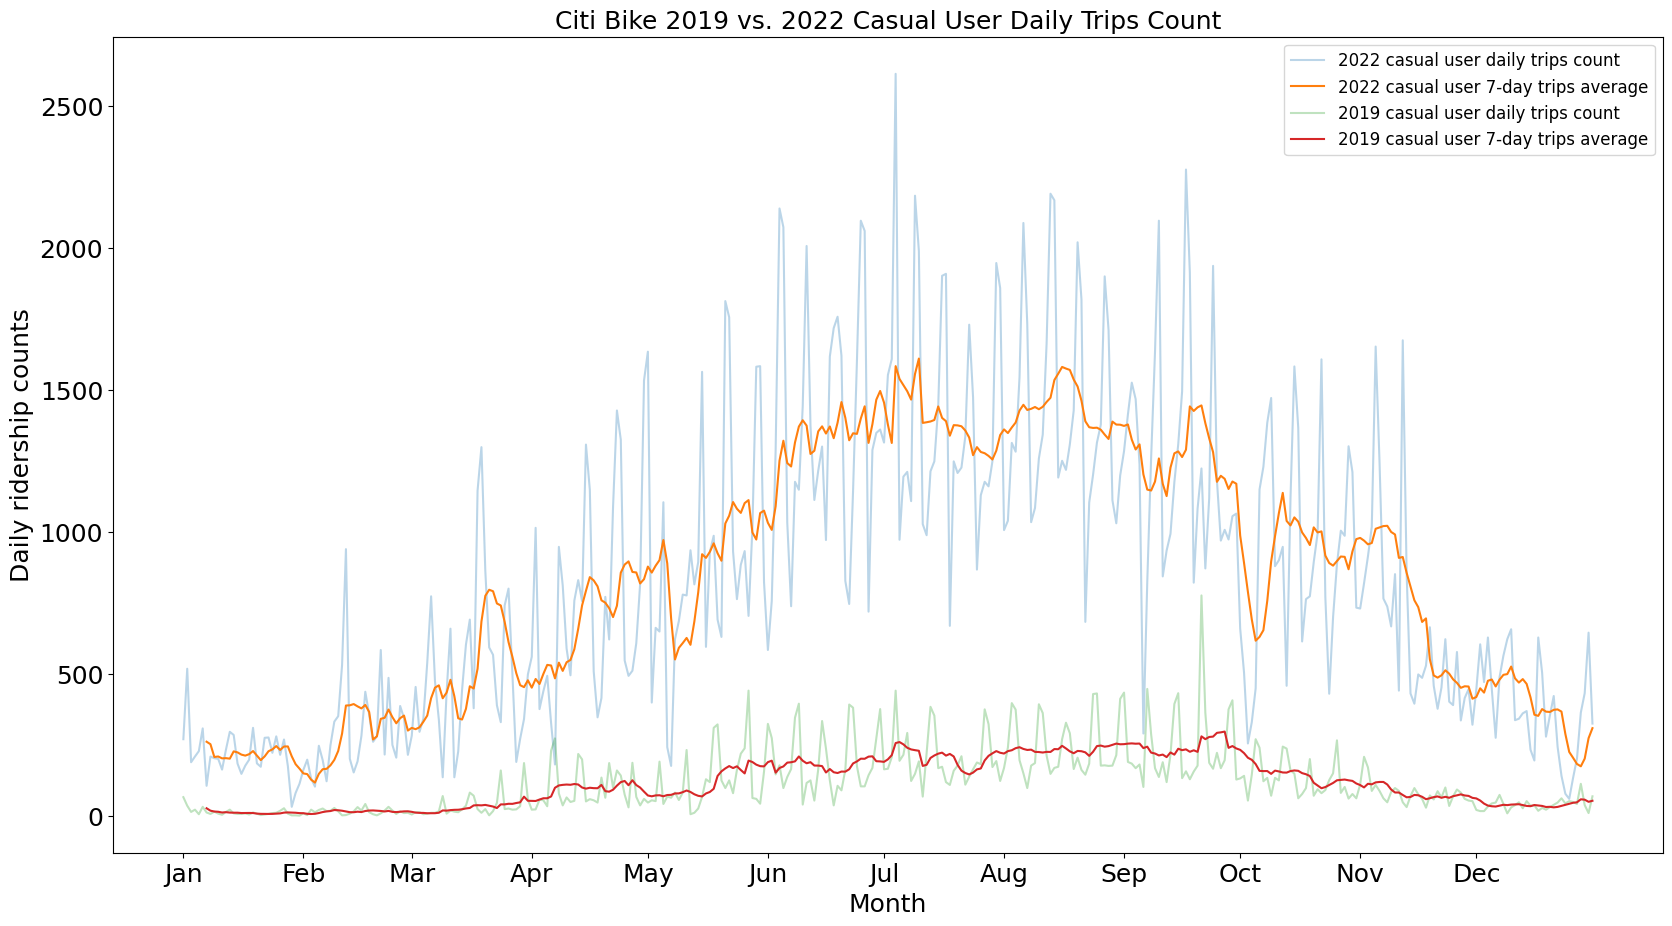

In [363]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2022, userTypeTripsCount2022['Customer'], 
         label='2022 casual user daily trips count', alpha=0.3)
plt.plot(dateList2022, casualAvg2022, 
         label='2022 casual user 7-day trips average')
plt.plot(dateList2022, userTypeTripsCount2019['Customer'], 
         label='2019 casual user daily trips count', alpha=0.3)
plt.plot(dateList2022, casualAvg2019, 
         label='2019 casual user 7-day trips average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Casual User Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2022[0], end=dateList2022[len(dateList2022) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

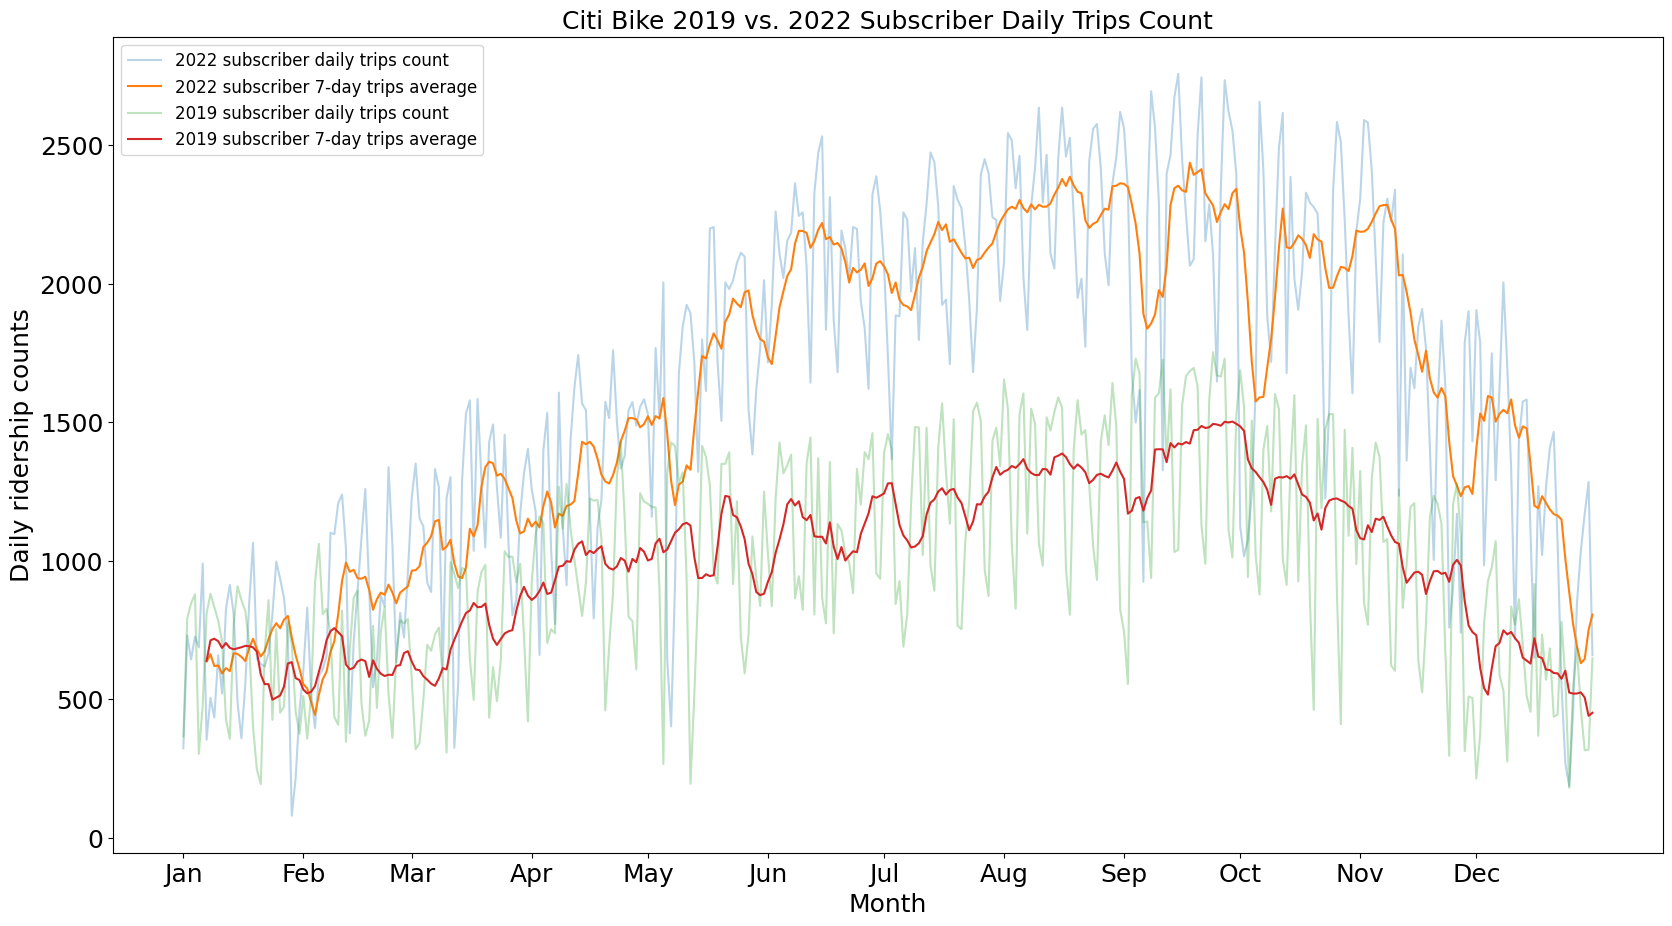

In [364]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2022, userTypeTripsCount2022['Subscriber'], 
         label='2022 subscriber daily trips count', alpha=0.3)
plt.plot(dateList2022, memberAvg2022, 
         label='2022 subscriber 7-day trips average')
plt.plot(dateList2022, userTypeTripsCount2019['Subscriber'], 
         label='2019 subscriber daily trips count', alpha=0.3)
plt.plot(dateList2022, memberAvg2019, 
         label='2019 subscriber 7-day trips average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Subscriber Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2022[0], end=dateList2022[len(dateList2022) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

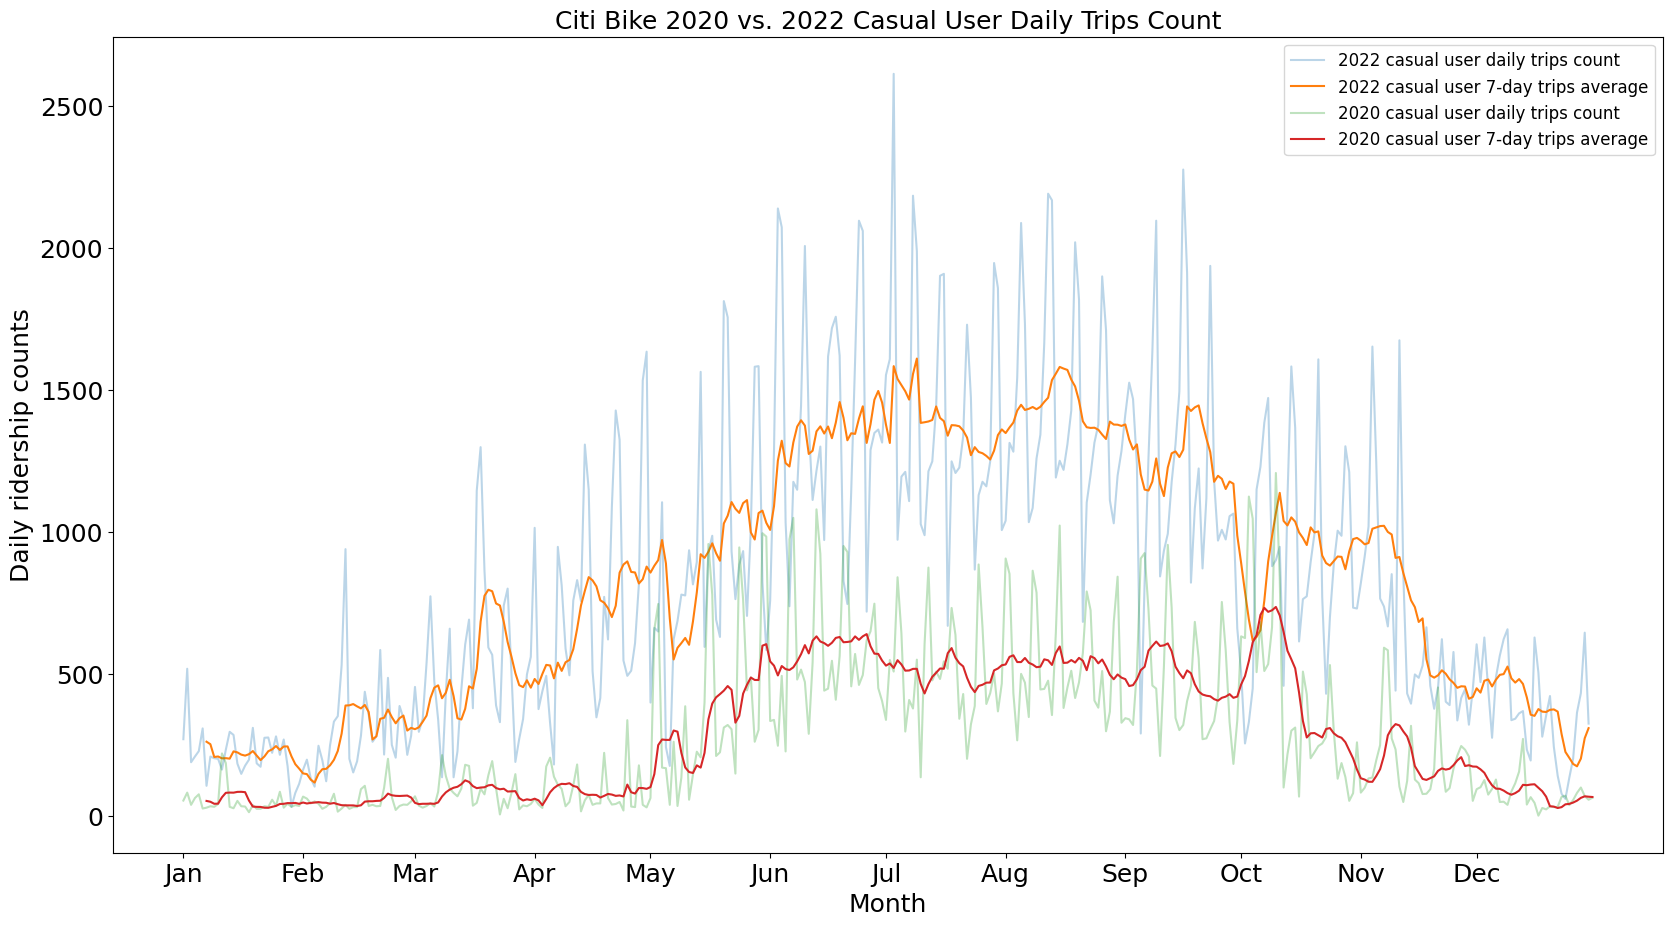

In [365]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# add one NaN to userTypeTripsCount2022 and casualAvg2022 since
# 2020 has 366 instead of 365 days
modifiedCustomerCol2022 = userTypeTripsCount2022['Customer'].tolist()
modifiedCustomerCol2022.append(np.nan)
casualAvg2022.append(np.nan)

# plot data
plt.plot(dateList2020, modifiedCustomerCol2022, 
         label='2022 casual user daily trips count', alpha=0.3)
plt.plot(dateList2020, casualAvg2022, 
         label='2022 casual user 7-day trips average')
plt.plot(dateList2020, userTypeTripsCount2020['Customer'], 
         label='2020 casual user daily trips count', alpha=0.3)
plt.plot(dateList2020, casualAvg2020, 
         label='2020 casual user 7-day trips average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Casual User Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

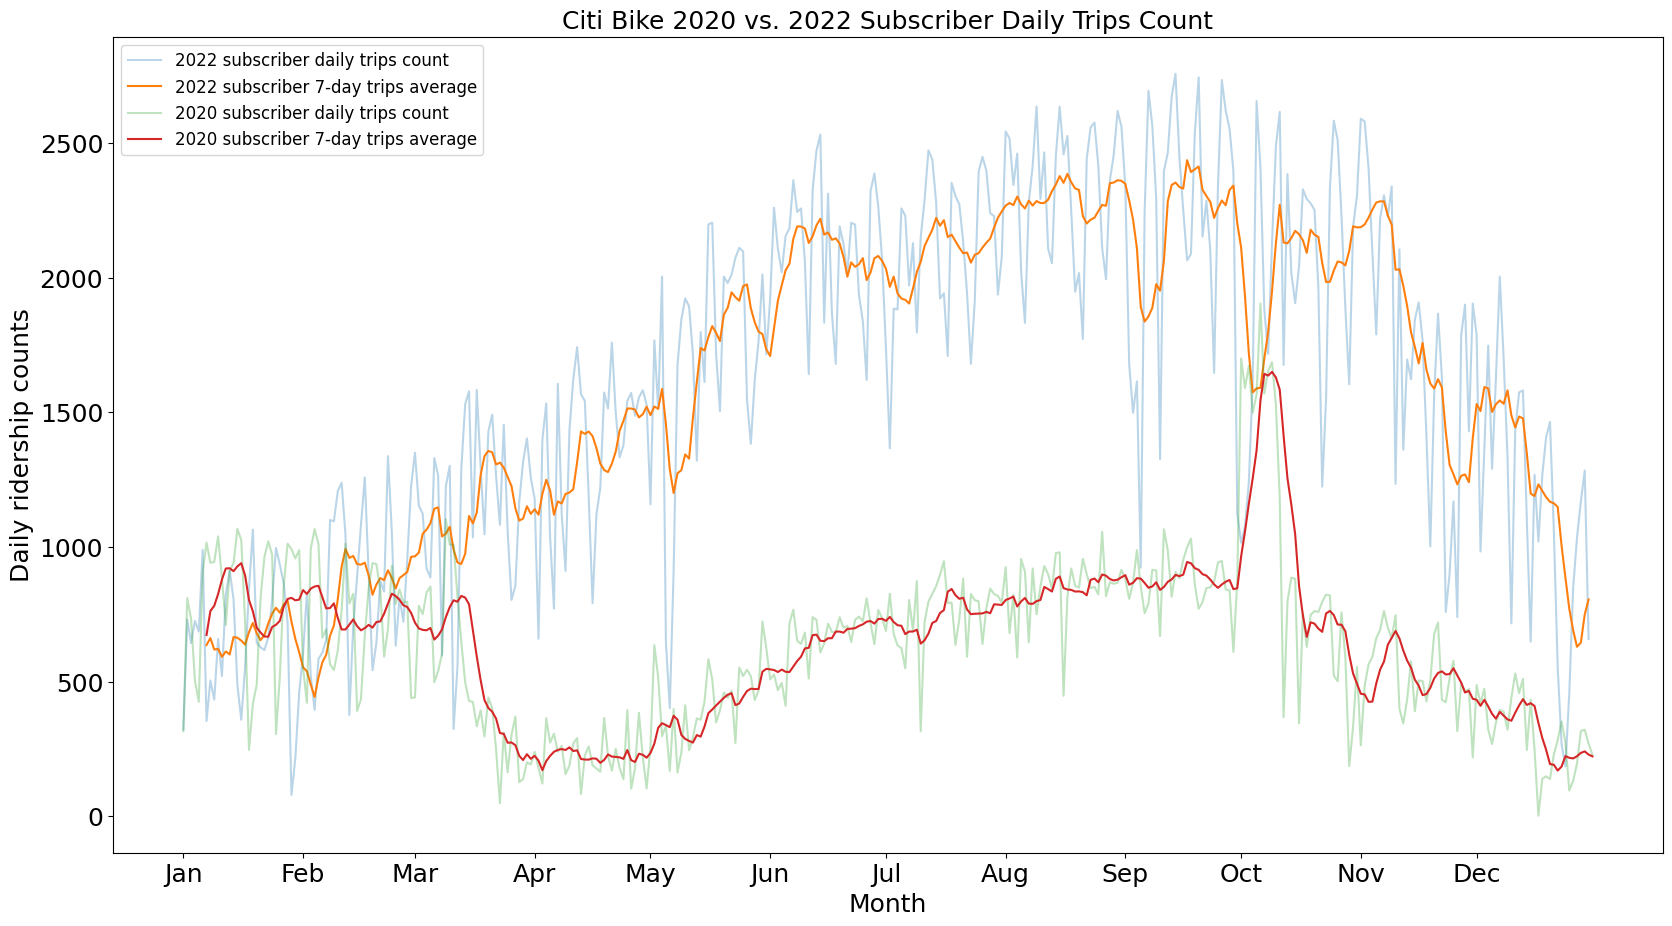

In [366]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# add one NaN to userTypeTripsCount2022 and memberAvg2022 since
# 2020 has 366 instead of 365 days
modifiedSubscriberCol2022 = userTypeTripsCount2022['Subscriber'].tolist()
modifiedSubscriberCol2022.append(np.nan)
memberAvg2022.append(np.nan)

# plot data
plt.plot(dateList2020, modifiedSubscriberCol2022, 
         label='2022 subscriber daily trips count', alpha=0.3)
plt.plot(dateList2020, memberAvg2022, 
         label='2022 subscriber 7-day trips average')
plt.plot(dateList2020, userTypeTripsCount2020['Subscriber'], 
         label='2020 subscriber daily trips count', alpha=0.3)
plt.plot(dateList2020, memberAvg2020, 
         label='2020 subscriber 7-day trips average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Subscriber Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

In [367]:
# pop the temporary NaN value that we've added to casualAvg2022 and memberAvg2022
casualAvg2022.pop()
memberAvg2022.pop()

nan